# Data Cleaning and Exploration


## Table of Contents:
1. [Important Information](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/data_cleaning_and_exploration.ipynb#Important-Information)    
2. [Unpickle the Data](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/data_cleaning_and_exploration.ipynb#Unpickle-the-Data)    
3. [Initial Data Exploration](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/data_cleaning_and_exploration.ipynb#Initial-Data-Exploration)    
4. [Data Cleaning](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/data_cleaning_and_exploration.ipynb#Data-Cleaning)    

## Important Information
### Prior to the Creation of this Script:
I have scraped the list of musicians from Wikipedia using wiki_musicians.py.  I manually cleaned the text file to remove double quotations ("") and parentheticals like "(performer)," "(musician)," and "(singer)," since it was manageable with just 111 artists.

I then retrieved lyrics from these artists from Genius.com using lyricsgenius_requests.ipynb, where 70+ artist-queries successfully returned JSON files.

Lastly, I created and pickled the lyrics data frame (or rough_df.pkl) in the load_json_to_df.ipynb script, where an additional 8 artists could not be successfully loaded, due to entirely null lyrical entries.  This pickled data frame remains in my local repository.

The steps above were broken into so many scripts to avoid re-running time-intensive queries.

## Unpickle the Data

In [1]:
import pickle
f = open('data/rough_df.pkl', 'rb')
lyricsdf = pickle.load(f)
f.close()

In [2]:
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,Bring It When You Come Lyrics\nTerrible things...
1,Abner Jay,Cocaine,Cocaine Lyrics\nFolk music is high-class music...
2,Abner Jay,Cocaine Blues,"Cocaine Blues LyricsCocaine, Cocaine\nRunning ..."
3,Abner Jay,Don’t Mess with Me Baby,Don’t Mess with Me Baby Lyrics\nTerrible thing...
4,Abner Jay,I cried,"I cried LyricsI, I cried\nI cried in the ni-ig..."


## Initial Data Exploration
Before cleaning, I'd like to see the status of the data: 
- how many artists are there,
- how many songs,
- how many lyrics are empty strings,
- how many are duplicates,
- and what is the artist distribution like?

In [3]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
lyricsdf.describe()

,artist,title,lyrics
count,3388,3388,3388
unique,63,3359,3187
top,Wesley Willis,Lullaby,
freq,561,3,202


It looks like there are 3,388 lyric entries, with 63 unique artists. I sense there are a number of "null" lyrics, given that nearly 200 entries are not unique.  This may also be explained by duplicates (though I wouldn't expect exact duplicates for non-null lyrics).

In [5]:
# Find duplicates
len(lyricsdf[lyricsdf.lyrics == ""])

202

In [6]:
lyricsdf.lyrics.duplicated().value_counts()

False    3187
True      201
Name: lyrics, dtype: int64

201 lyric entries are duplicates of other entries, and 202 lyric entries are empty strings.  I'll clean now by replaced empty strings with null values.

In [7]:
lyricsdf = lyricsdf.replace("", np.nan)

In [8]:
len(lyricsdf[lyricsdf.lyrics == ""])

0

In [9]:
lyricsdf.describe()

,artist,title,lyrics
count,3388,3388,3186
unique,63,3359,3186
top,Wesley Willis,Lullaby,"Blood on My Neck from Success LyricsUhh, shoot..."
freq,561,3,1


In [10]:
lyricsdf.artist.value_counts()

Wesley Willis        561
Jandek               351
Daniel Johnston      316
Viper                261
Brian Wilson         237
                    ... 
Varg Vikernes          1
Dr. Demento            1
Damião Experiença      1
Lucia Pamela           1
Mrs. Miller            1
Name: artist, Length: 63, dtype: int64

A good portion of the data is made up of Wesley Willis music (561 songs), while it appears that many artists may only have 1 or 2 songs in the list.  Obviously, this may skew the analysis toward "Wesley Willis" music and away from the more general "Outsider Music" genre.  I will wait until my data is fully cleaned before making any judgments on how to deal with this potential skew.

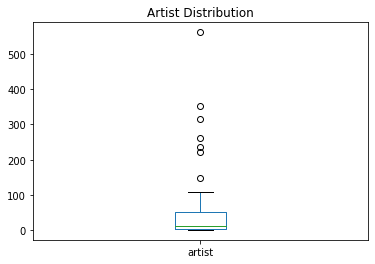

In [11]:
lyricsdf.artist.value_counts().plot(kind = "box", rot=0, title = "Artist Distribution")

This box plot is probably the cleanest way to visualize the artist distribution: there are many artists with only 1 or so songs in the data, as shown by the incredibly cramped 2nd quartile.  But there are also a handful of outliers with hundreds of songs present in the data.

## Data Cleaning

As I move forward with data cleaning, I will need to first take care of the "Song Title Lyrics" issue present at the beginning of most (if not all) of the lyrics in the dataset, then strip whitespace from the lyric text and handle "\n" within the lyric body.